# 4.12 自定义坐标轴刻度

## 4.12.1 主要刻度与次要刻度

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

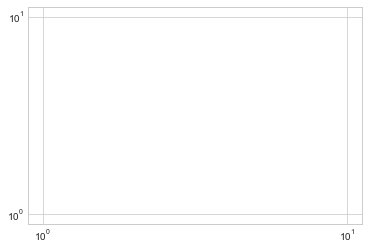

In [2]:
ax = plt.axes(xscale='log', yscale='log')

In [3]:
ax.xaxis.get_major_locator()

In [4]:
ax.xaxis.get_minor_locator()

In [5]:
ax.xaxis.get_major_formatter()

In [6]:
ax.xaxis.get_minor_formatter()

## 4.12.2 隐藏刻度与标签

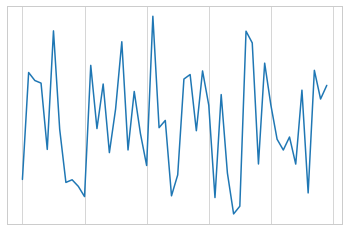

In [14]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

我们移除了x轴的标签（但是保留了刻度线/网格线），以及y轴的刻度（标签也一并被移除）。

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Administrator\scikit_learn_data


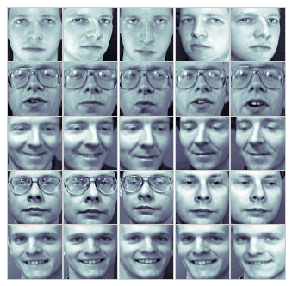

In [15]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 从scikit-learn获取一些人脸照片数据
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

## 4.12.3 增减刻度数量

默认刻度标签的问题：显示较小图形时，通常刻度显得十分拥挤。

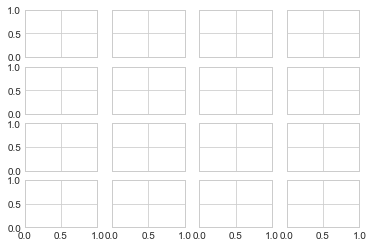

In [16]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

我们可以用plt.MaxNLocator()来解决这个问题

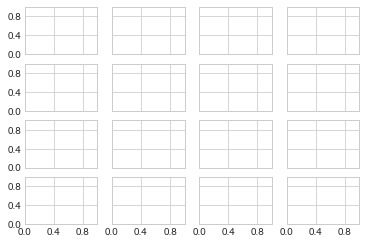

In [18]:
# 为每个坐标轴设置主要刻度定位器
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
    
fig

## 4.12.3 花哨的刻度格式

(0, 9.42477796076938)

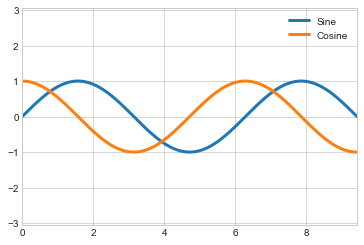

In [19]:
# 画正弦曲线和余弦曲线
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网络、图例和坐标轴上下限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

将刻度放在你提供的数值的倍数上。

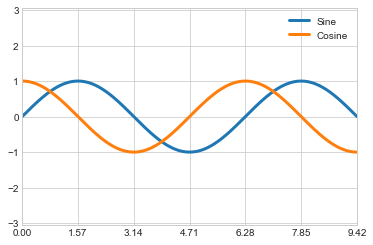

In [21]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

用一个自定义的函数来设置不同刻度标签的显示。

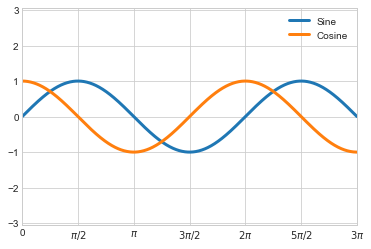

In [22]:
def format_func(value, tick_number):
    # 找到pi/2的倍数刻度，round是四舍五入
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

## 4.12.5 格式生成器与定位器小结

# 4.13 Matplotlib自定义：配置文件与样式表

## 4.13.1 手动配置图形

In [23]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

In [24]:
%matplotlib inline

(array([ 10.,  43.,  91., 177., 246., 211., 150.,  51.,  18.,   3.]),
 array([-2.95693986, -2.33076618, -1.7045925 , -1.07841882, -0.45224514,
         0.17392854,  0.80010222,  1.4262759 ,  2.05244958,  2.67862327,
         3.30479695]),
 <a list of 10 Patch objects>)

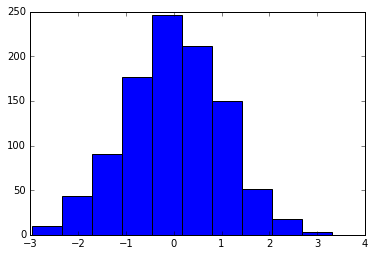

In [25]:
x = np.random.randn(1000)
plt.hist(x)

曾经包含的属性axisbg已经被facecolor所替换

(array([ 10.,  43.,  91., 177., 246., 211., 150.,  51.,  18.,   3.]),
 array([-2.95693986, -2.33076618, -1.7045925 , -1.07841882, -0.45224514,
         0.17392854,  0.80010222,  1.4262759 ,  2.05244958,  2.67862327,
         3.30479695]),
 <a list of 10 Patch objects>)

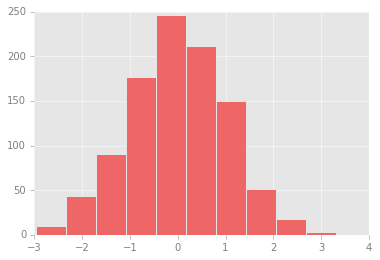

In [33]:
# 用灰色背景
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# 画上白色的网格线
plt.grid(color='w', linestyle='solid')

# 隐藏坐标轴的线条
for spine in ax.spines.values():
    spine.set_visible(False)
    
# 隐藏上边与右边的刻度
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 弱化刻度与标签
ax.tick_params(color='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# 设置频次直方图轮廓色与填充色
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

有一种方法，可以让我们只配置一次默认图形，就能将其应用到所有的图形上。

## 4.13.2 修改默认配置：rcParams

先复制一下目前的rcParams字典，这样就可以在修改之后再还原回来。

In [34]:
Ipython_default = plt.rcParams.copy()

In [35]:
from matplotlib import cycler

In [36]:
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])

In [37]:
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)

In [38]:
plt.rc('grid', color='w', linestyle='solid')

In [39]:
plt.rc('xtick', direction='out', color='gray')

In [40]:
plt.rc('ytick', direction='out', color='gray')

In [41]:
plt.rc('patch', edgecolor='#E6E6E6')

In [42]:
plt.rc('lines', linewidth=2)

(array([ 10.,  43.,  91., 177., 246., 211., 150.,  51.,  18.,   3.]),
 array([-2.95693986, -2.33076618, -1.7045925 , -1.07841882, -0.45224514,
         0.17392854,  0.80010222,  1.4262759 ,  2.05244958,  2.67862327,
         3.30479695]),
 <a list of 10 Patch objects>)

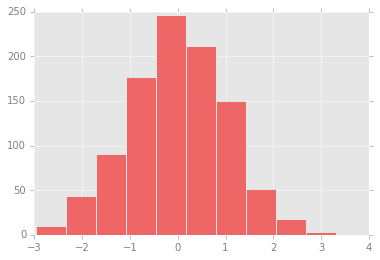

In [43]:
plt.hist(x)

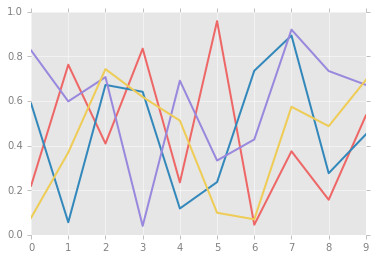

In [44]:
for i in range(4):
    plt.plot(np.random.rand(10))

## 4.13.3 样式表

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
plt.style.available[:5]

['seaborn-poster',
 'seaborn-white',
 'seaborn-deep',
 'tableau-colorblind10',
 'seaborn-pastel']

In [47]:
plt.style.use('seaborn-poster')

使用风格上下文管理器临时更换另一种风格

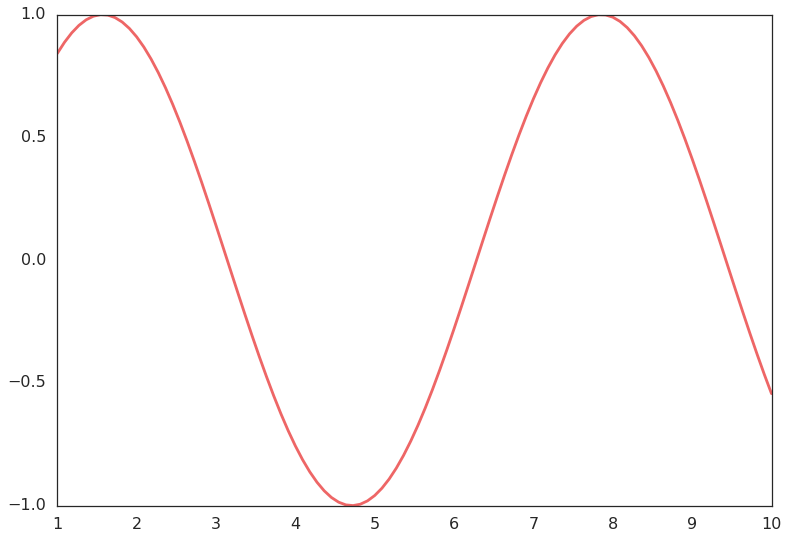

In [52]:
with plt.style.context('seaborn-white'):
    x = np.linspace(1, 10, 100)
    y = np.sin(x)
    plt.plot(x, y)

In [56]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

1. 默认风格

In [54]:
# 重置rcParams
plt.rcParams.update(Ipython_default)

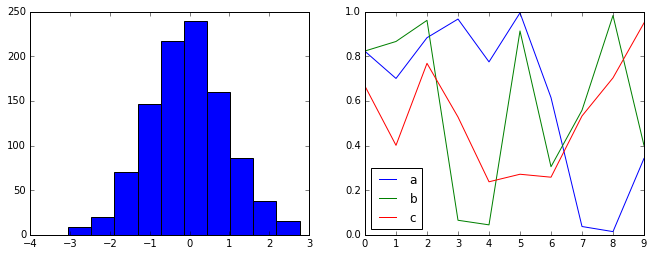

In [57]:
hist_and_lines()

2. FiveThirtyEight风格

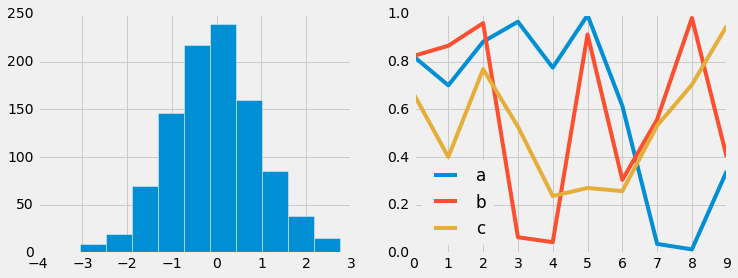

In [58]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

3. ggplot风格

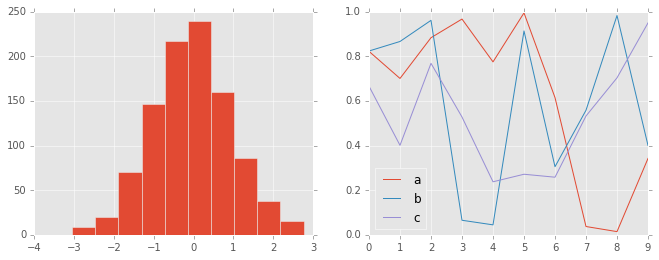

In [59]:
with plt.style.context('ggplot'):
    hist_and_lines()

4. bmh风格

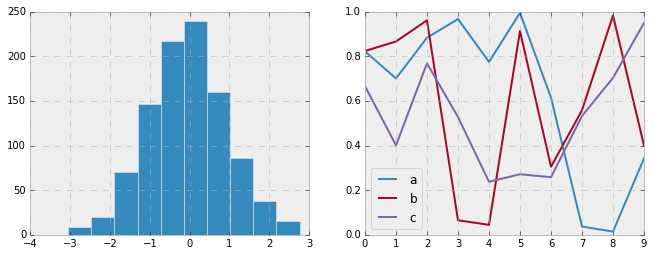

In [60]:
with plt.style.context('bmh'):
    hist_and_lines()

5. 黑色背景风格

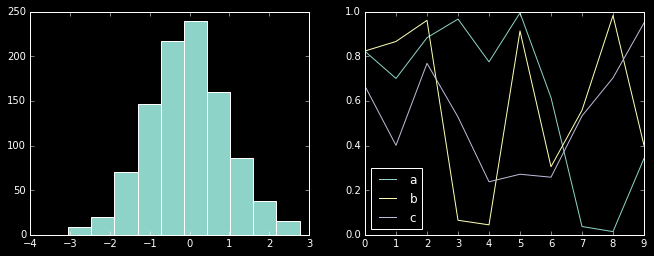

In [61]:
with plt.style.context('dark_background'):
    hist_and_lines()

6. 灰度风格（适合打印，不能使用彩色的图）

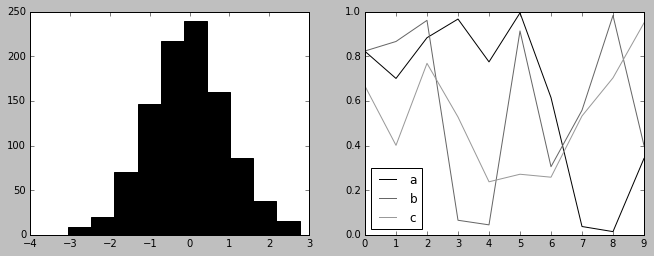

In [63]:
with plt.style.context('grayscale'):
    hist_and_lines()

7. Seabron风格

In [68]:
import seaborn
seaborn.set()

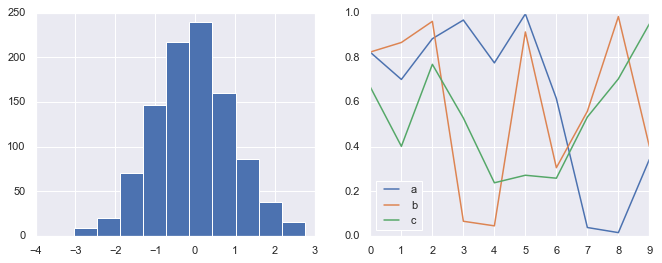

In [69]:
hist_and_lines()

# 4.14 用Matplotlib画三维图

In [1]:
from mpl_toolkits import mplot3d

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

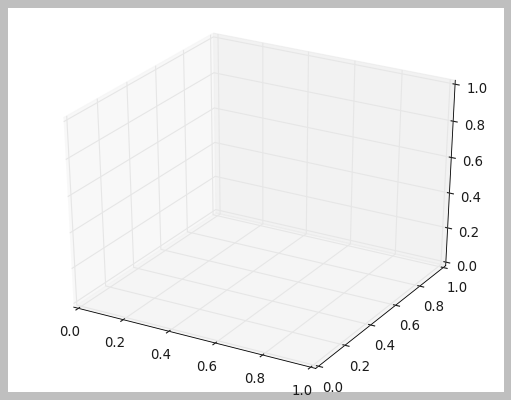

In [81]:
fig = plt.figure()
ax = plt.axes(projection='3d')

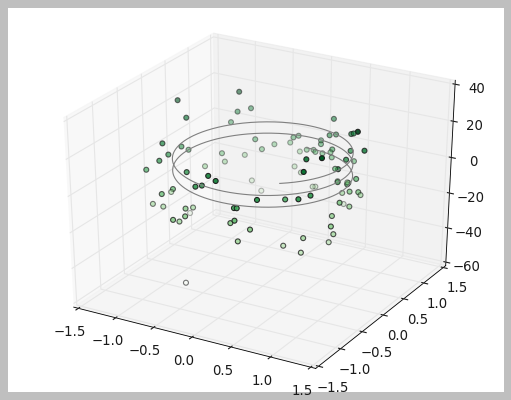

In [83]:
ax = plt.axes(projection='3d')

# 三维线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.randn(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

## 4.14.2 三维等高线图

In [4]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

In [85]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

In [86]:
X, Y = np.meshgrid(x, y)

In [87]:
Z = f(X, Y)

Text(0.5,0,'z')

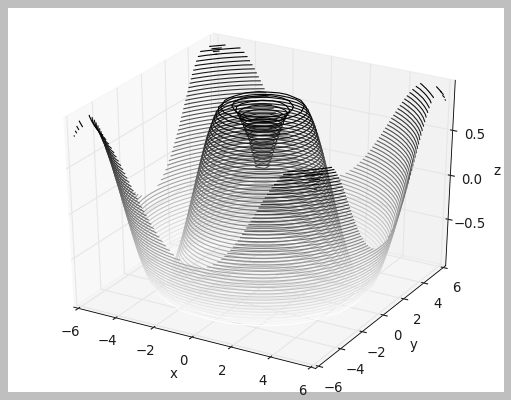

In [90]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

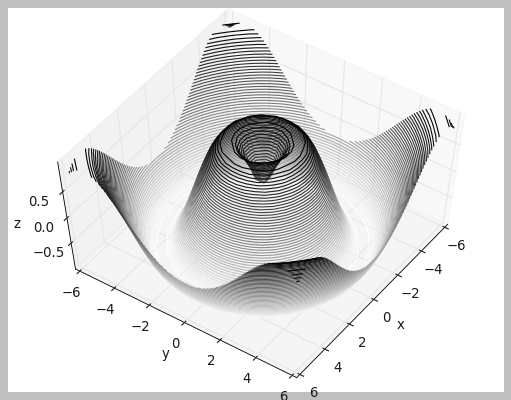

In [91]:
ax.view_init(60, 35)
fig

## 4.14.3 线框图和曲面图

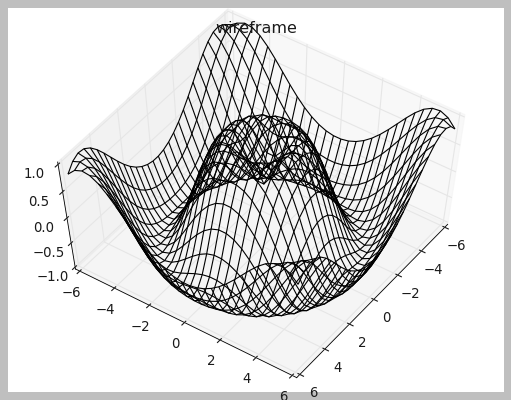

In [101]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')
ax.view_init(60, 35)

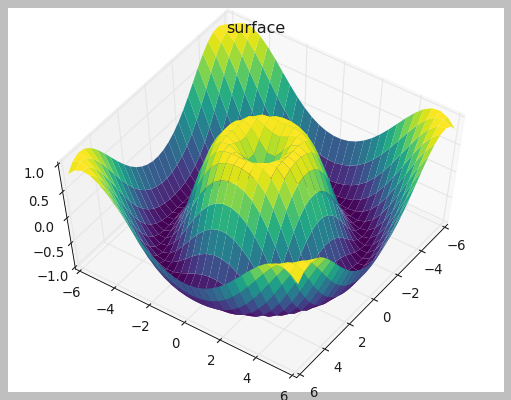

In [107]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')
ax.view_init(60, 35)

极坐标画曲面图

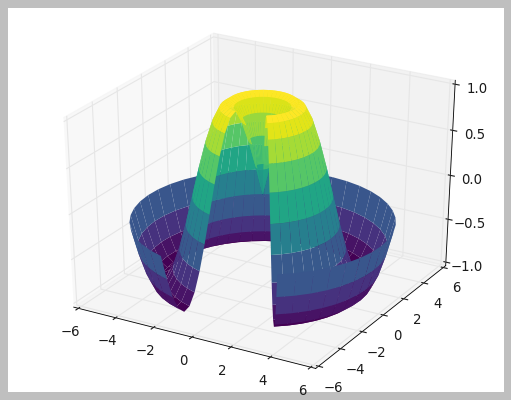

In [110]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

## 4.14.4 曲面三角剖分

In [5]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

为数据点创建一个散点图

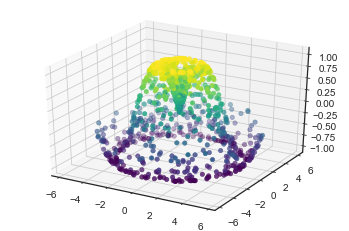

In [6]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

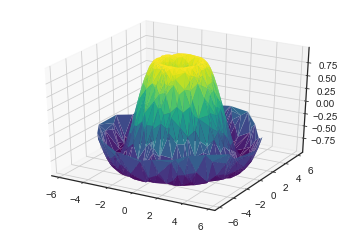

In [7]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

案例：莫比乌斯带

In [9]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [10]:
phi = 0.5 * theta

In [11]:
# x - y平面内的半径
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

(-1, 1)

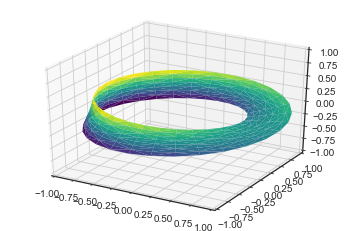

In [13]:
# 用基本参数化方法定义三角剖分
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax  = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='viridis', linewidths=0.2)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)